In [1]:
%matplotlib inline

import networkx as nx
from node2vec import Node2Vec
from tqdm import tqdm_notebook
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
import community as cm

In [2]:
edges = []
classes = []
nodes = []

with open('hepth/blogcatalog/edges.csv', 'rb') as f:
    for line in f:
#         print(line.strip().split(b','))
        edges.append(line.strip().split(b','))
    
with open('hepth/blogcatalog/group-edges.csv', 'rb') as f:
    for line in f:
        classes.append(line.strip().split(b','))
    
with open('hepth/blogcatalog/nodes.csv', 'rb') as f:
    for line in f:
        nodes.append(line.strip())
    
edges[:5]

[[b'1', b'176'],
 [b'1', b'233'],
 [b'1', b'283'],
 [b'1', b'371'],
 [b'1', b'394']]

In [3]:
node_dict = {}
cur = 0

old_cur = cur
for node in nodes:
    if not node in node_dict:
        node_dict[node] = cur
        cur += 1
        
for i in range(len(edges)):
    edges[i] = (node_dict[edges[i][0]], node_dict[edges[i][1]])
    
for i in range(len(classes)):
    classes[i] = (node_dict[classes[i][0]], int(classes[i][1]))

In [4]:
network = nx.Graph()
network.add_edges_from(edges)

print(network.number_of_nodes(), network.number_of_edges())

10312 333983


In [5]:
layout = nx.spring_layout(network)

C:\Users\jxbox\Anaconda3\lib\site-packages\networkx\drawing\layout.py:596: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt((delta**2).sum(axis=0))


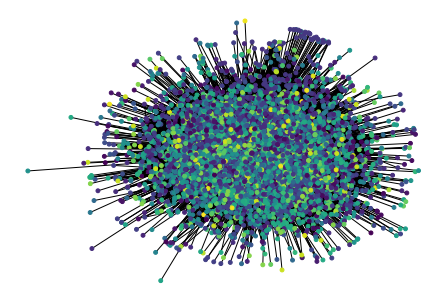

In [6]:
classes = dict(classes)
attrs = [classes[x] for x in network.nodes]

nx.draw(network, pos=layout, node_size=15, node_color=attrs)

In [7]:
# node2vec = Node2Vec(network, dimensions=8, workers=12)
# model = node2vec.fit()

# vecs = model.wv.vectors

In [8]:
nx.set_node_attributes(network, classes, 'classes')
nx.write_graphml(network, 'hepth/blogcatalog/graph.graphml')